# Sentiment Analysis

This Sentiment Analysis focuses on analysing sentiments using two methods:

* VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
* Roberta Pretrained Model

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

plt.style.use('ggplot')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import nltk

In [4]:
# Load the first 100,000 rows
df = pd.read_csv('/Reviews.csv', nrows=100000)

# Save to a new CSV file
df.to_csv('Reviews_first100k.csv', index=False)

# Download the file
from google.colab import files
files.download('Reviews_first100k.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Simple EDA

In [5]:
df.shape

(100000, 10)

In [8]:
df.head()
# df.head(100)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df['Text'].values[1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [10]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

Text(0, 0.5, 'Count of Ratings')

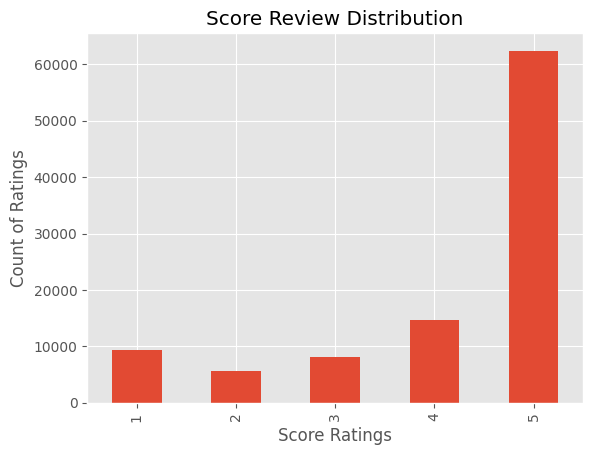

In [17]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',
                                             title='Score Review Distribution')
ax.set_xlabel('Score Ratings')
ax.set_ylabel('Count of Ratings')

In [18]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,6
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,2
Text,0


# Basic NLP on a sample_data

In [21]:
sample_data = df['Text'][70]
print(sample_data)

These Albanese gummi bears and rings and so on are very good and tasty and high quality. The bears even have little faces. At my local candy store this type of gummi stuff (bears, rings, snakes, balls, worms, whatever) are about $10/lb. These twin packs of 4.5 or 5 pound bags is a screaming deal as far as I'm concerned. I'm probably 50 pounds deep in these friggin' things. Consumed!


In [43]:
# nltk libraries needed for sentiment analysis, uncomment to download if needed

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('vader_lexicon')

In [44]:
# tokenize comment for computer understanding

tokens = nltk.word_tokenize(sample_data)
print(tokens)

['These', 'Albanese', 'gummi', 'bears', 'and', 'rings', 'and', 'so', 'on', 'are', 'very', 'good', 'and', 'tasty', 'and', 'high', 'quality', '.', 'The', 'bears', 'even', 'have', 'little', 'faces', '.', 'At', 'my', 'local', 'candy', 'store', 'this', 'type', 'of', 'gummi', 'stuff', '(', 'bears', ',', 'rings', ',', 'snakes', ',', 'balls', ',', 'worms', ',', 'whatever', ')', 'are', 'about', '$', '10/lb', '.', 'These', 'twin', 'packs', 'of', '4.5', 'or', '5', 'pound', 'bags', 'is', 'a', 'screaming', 'deal', 'as', 'far', 'as', 'I', "'m", 'concerned', '.', 'I', "'m", 'probably', '50', 'pounds', 'deep', 'in', 'these', 'friggin', "'", 'things', '.', 'Consumed', '!']


In [53]:
# part of speech tagging

pos_tag = nltk.pos_tag(tokens[:17])  # take the first 17 words
pos_tag

[('These', 'DT'),
 ('Albanese', 'JJ'),
 ('gummi', 'NN'),
 ('bears', 'NNS'),
 ('and', 'CC'),
 ('rings', 'NNS'),
 ('and', 'CC'),
 ('so', 'RB'),
 ('on', 'IN'),
 ('are', 'VBP'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('and', 'CC'),
 ('tasty', 'JJ'),
 ('and', 'CC'),
 ('high', 'JJ'),
 ('quality', 'NN')]

In [48]:
# download module if needed

# !pip install svgling

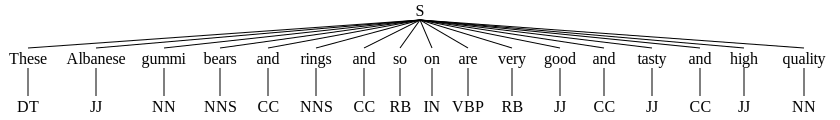

In [57]:
entities = nltk.chunk.ne_chunk(pos_tag)
entities

# VADER(Valence Aware Dictionary and sEntiment Reasoner) Sentiment Scoring

It uses "bag of words" approach

* remove stop words
* each word is scored and combined to a total score

In [58]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [59]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [60]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [61]:
# Get Polarity score of entire dataset

In [62]:
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  result[myid] = sia.polarity_scores(text)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [72]:
# sentiment analysis for the entire data

vaders = pd.DataFrame(result).T

In [73]:
vaders.head(100) # show analysis for first 100 rows

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
6,0.029,0.809,0.163,0.8830
7,0.034,0.693,0.273,0.9346
8,0.000,0.520,0.480,0.9487
9,0.000,0.851,0.149,0.6369
10,0.000,0.705,0.295,0.8313


In [76]:
# merge sentiment analysis to origninal data

vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [77]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Plot Vader results

Text(0.5, 1.0, 'Compound Score by Amazon Star Review')

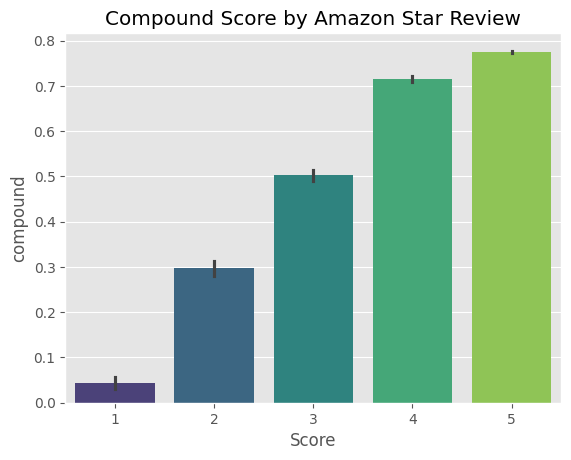

In [82]:
ax = sns.barplot(data=vaders, x='Score', y='compound', palette='viridis')
ax.set_title('Compound Score by Amazon Star Review')

Intuitively the higher rating has higher compound score

Text(0.5, 1.0, 'Negative')

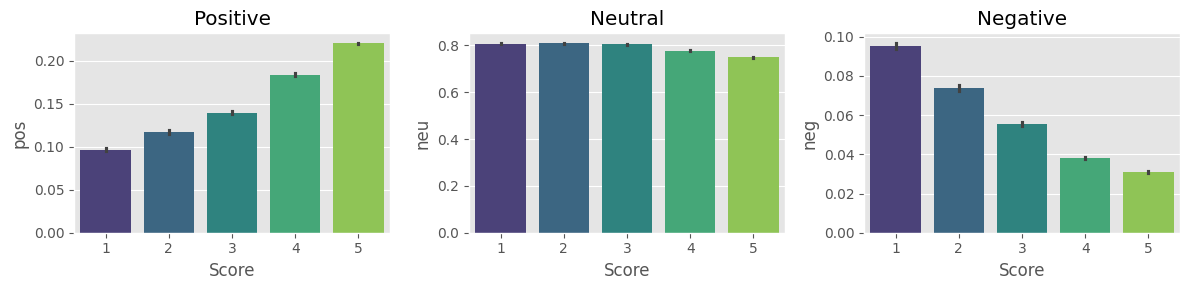

In [88]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0], palette='viridis')
axs[0].set_title('Positive')
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1], palette='viridis')
axs[1].set_title('Neutral')
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2], palette='viridis')
plt.tight_layout()
axs[2].set_title('Negative')

# Roberta Pretrained Model

This model is more context specific compared to vaders

In [90]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [91]:
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [93]:
print(sample_data)
sia.polarity_scores(sample_data)

These Albanese gummi bears and rings and so on are very good and tasty and high quality. The bears even have little faces. At my local candy store this type of gummi stuff (bears, rings, snakes, balls, worms, whatever) are about $10/lb. These twin packs of 4.5 or 5 pound bags is a screaming deal as far as I'm concerned. I'm probably 50 pounds deep in these friggin' things. Consumed!


{'neg': 0.036, 'neu': 0.916, 'pos': 0.048, 'compound': 0.2228}

In [96]:
# Run sample for Roberta Model

tokens = tokenizer.encode_plus(sample_data, max_length=512, truncation=True, return_tensors='pt')
output = model(**tokens)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_negative' : scores[0],
    'roberta_neutral' : scores[1],
    'roberta_positive' : scores[2]
}
print(scores_dict)

{'roberta_negative': np.float32(0.032239832), 'roberta_neutral': np.float32(0.13916074), 'roberta_positive': np.float32(0.82859945)}


Run Polarity Score on Roberta on entire dataset

In [101]:
roberta_results = {}
for i, row in tqdm(df.head(1000).iterrows(), total=1000):
    try:
        text = row['Text']
        myid = row['Id']
        roberta_results[myid] = roberta_polarity_scores(text)
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

In [105]:
# create the roberta_vaders DataFrame as before
roberta_vaders = pd.DataFrame(roberta_results).T
roberta_vaders = roberta_vaders.reset_index().rename(columns={'index': 'Id'})

In [106]:
roberta_vaders.head()

,Id,roberta_negative,roberta_neutral,roberta_positive
0,1,0.009624,0.049980,0.940395
1,2,0.508986,0.452414,0.038600
2,3,0.003229,0.098067,0.898704
3,4,0.002295,0.090219,0.907486
4,5,0.001635,0.010302,0.988063


In [107]:
# merge roberta_vaders with the original df
merged_df = roberta_vaders.merge(df, how='left', on='Id')

# merge the vaders DataFrame into the merged_df
final_merged_df = merged_df.merge(vaders[['Id', 'neg', 'neu', 'pos', 'compound']], how='left', on='Id')

# Display the head of the final merged DataFrame
display(final_merged_df.head())

,Id,roberta_negative,roberta_neutral,roberta_positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,5,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468


In [116]:
# Rename the VADER columns for consistency
final_merged_df = final_merged_df.rename(columns={
    'vader_neg': 'vader_negative',
    'vader_neu': 'vader_neutral',
    'vader_pos': 'vader_positive',
    'vader_compound': 'vader_compound'
})

display(final_merged_df.head())

,Id,roberta_negative,roberta_neutral,roberta_positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,vader_negative,vader_neutral,vader_positive,vader_compound
0,1,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,5,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468


# Comparative Analysis: VADER vs. Roberta

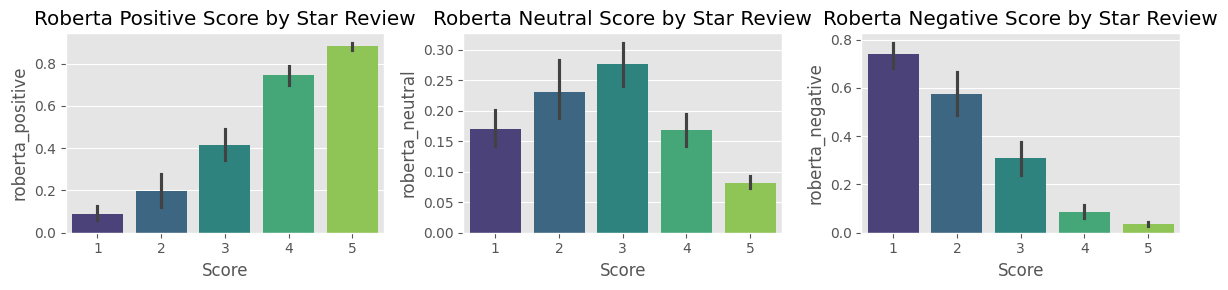

In [109]:
# Visualize Roberta sentiment scores by Amazon Star Review
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=final_merged_df, x='Score', y='roberta_positive', ax=axs[0], palette='viridis')
axs[0].set_title('Roberta Positive Score by Star Review')
sns.barplot(data=final_merged_df, x='Score', y='roberta_neutral', ax=axs[1], palette='viridis')
axs[1].set_title('Roberta Neutral Score by Star Review')
sns.barplot(data=final_merged_df, x='Score', y='roberta_negative', ax=axs[2], palette='viridis')
axs[2].set_title('Roberta Negative Score by Star Review')
plt.tight_layout()
plt.show()

Comparison of VADER and Roberta Sentiment Scores Across Star Ratings

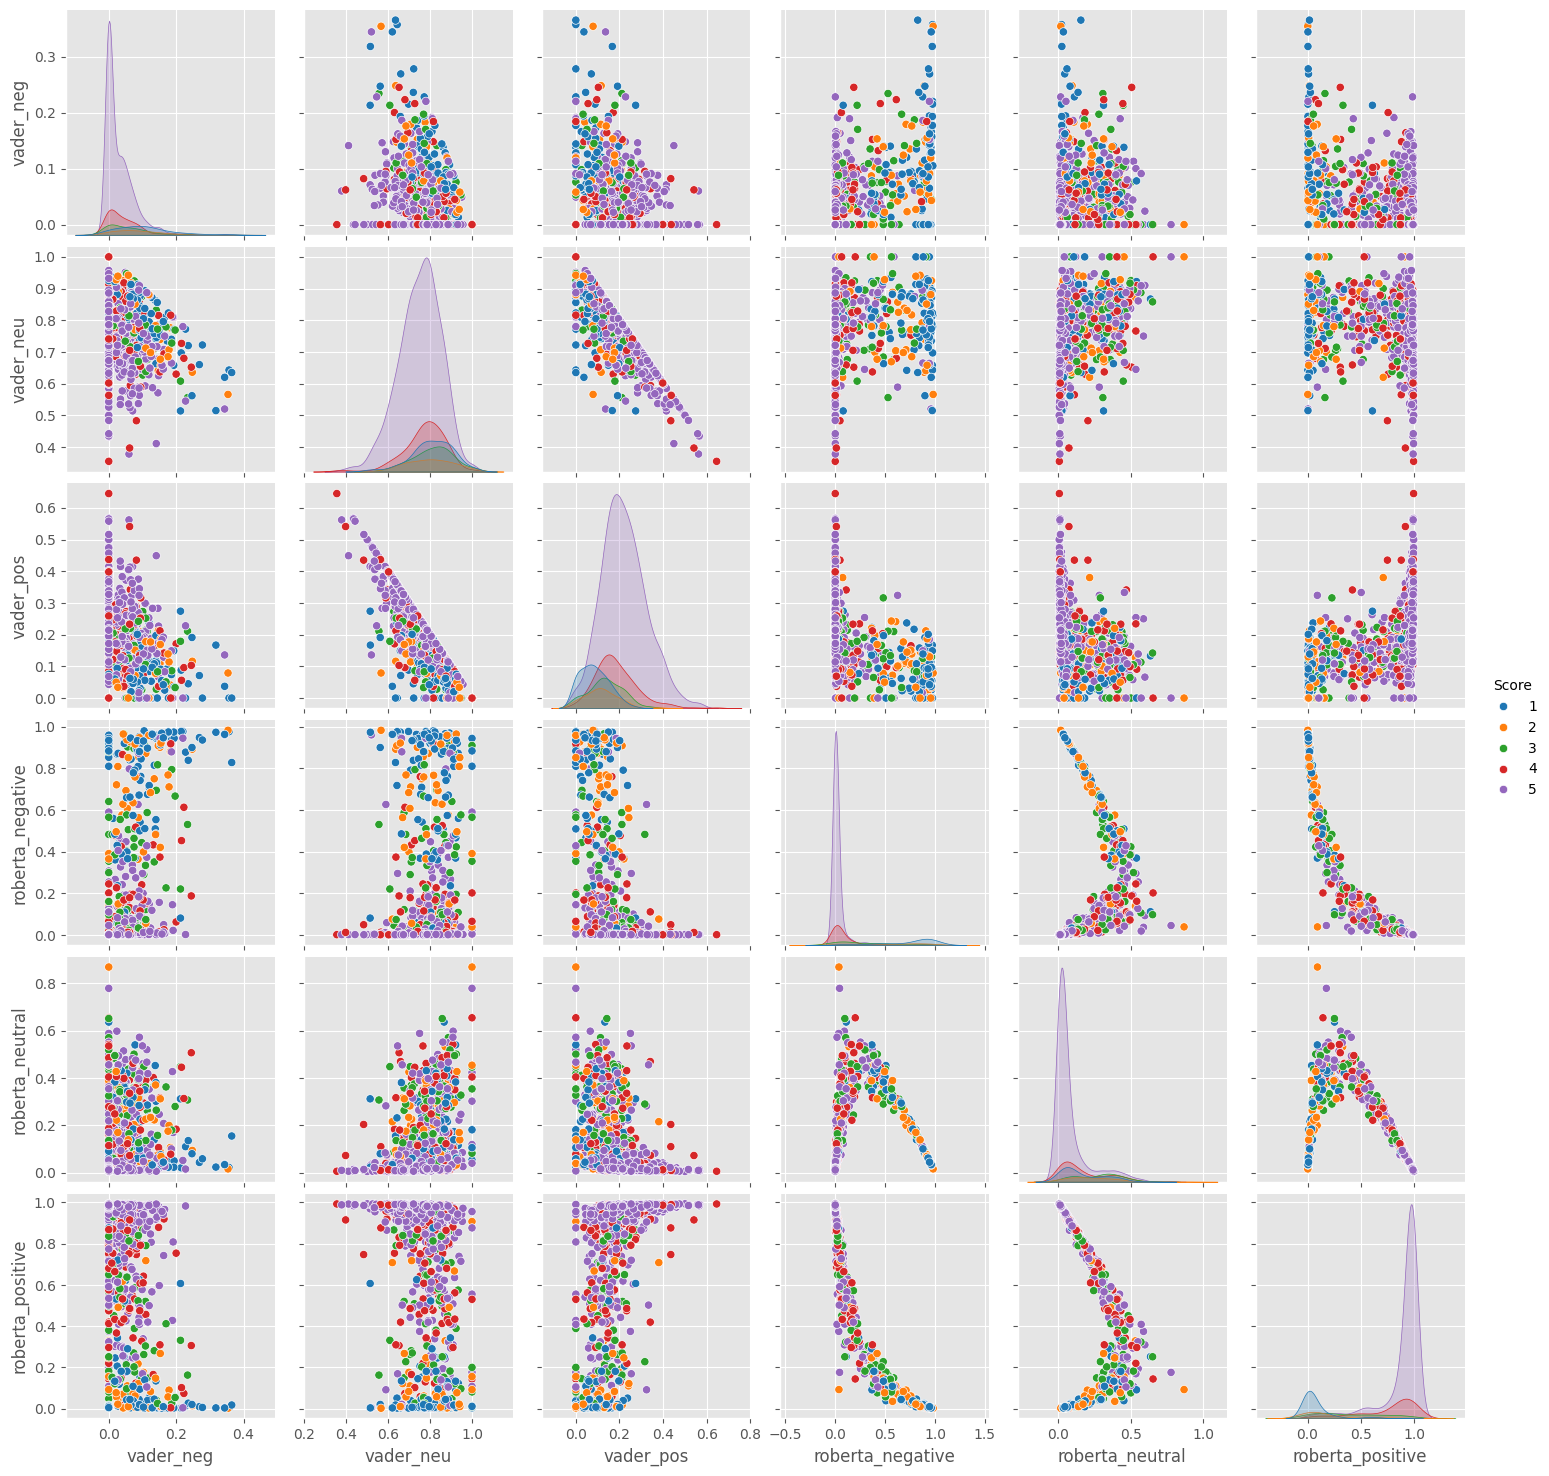

In [112]:
sns.pairplot(data=final_merged_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_negative', 'roberta_neutral', 'roberta_positive'], # Corrected Roberta column names
            hue='Score',
            palette='tab10')
plt.show()

# Examine specific examples where models might differ

* Example: Find reviews where VADER and Roberta compound scores disagree significantly
* reviews where VADER compound is positive but Roberta positive is low, or vice versa.

In [118]:
# Filter for reviews where VADER is positive but Roberta is neutral or negative
disagree_vader_pos_roberta_neg_neu = final_merged_df[
    (final_merged_df['vader_compound'] >= 0.05) &
    (final_merged_df['roberta_positive'] < 0.5) # Roberta positive score is less than 0.5
]

print("Examples where VADER is positive but Roberta is neutral or negative:")
display(disagree_vader_pos_roberta_neg_neu[['Score', 'Summary', 'Text', 'vader_negative', 'vader_neutral', 'vader_positive', 'vader_compound', 'roberta_negative', 'roberta_neutral', 'roberta_positive']].head()) # Corrected column list

# Filter for reviews where Roberta is positive but VADER compound is neutral or negative
disagree_roberta_pos_vader_neg_neu = final_merged_df[
    (final_merged_df['roberta_positive'] >= 0.5) & # Roberta positive score is 0.5 or higher
    (final_merged_df['vader_compound'] < 0.05) # VADER compound score is less than 0.05 (neutral or negative)
]

print("\nExamples where Roberta is positive but VADER is neutral or negative:")
display(disagree_roberta_pos_vader_neg_neu[['Score', 'Summary', 'Text', 'vader_negative', 'vader_neutral', 'vader_positive', 'vader_compound', 'roberta_negative', 'roberta_neutral', 'roberta_positive']].head()) # Corrected column list

Examples where VADER is positive but Roberta is neutral or negative:


,Score,Summary,Text,vader_negative,vader_neutral,vader_positive,vader_compound,roberta_negative,roberta_neutral,roberta_positive
12,1,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,0.031,0.923,0.046,0.2960,0.466125,0.415259,0.118616
24,5,Please sell these in Mexico!!,"I have lived out of the US for over 7 yrs now,...",0.038,0.895,0.068,0.3939,0.449527,0.390735,0.159738
49,3,Same stuff,This is the same stuff you can buy at the big ...,0.056,0.865,0.079,0.2363,0.902134,0.087925,0.009940
66,5,Low Carb Alternative to Gatorade,For those of us on a low carb diet these littl...,0.057,0.869,0.073,0.4920,0.135161,0.404392,0.460447
73,1,Warning! WARNING! -ALCOHOL SUGARS!,Buyer Beware Please! This sweetener is not for...,0.093,0.762,0.144,0.9665,0.541301,0.304906,0.153794



Examples where Roberta is positive but VADER is neutral or negative:


,Score,Summary,Text,vader_negative,vader_neutral,vader_positive,vader_compound,roberta_negative,roberta_neutral,roberta_positive
3,2,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486
94,5,So convenient,This is the same food we get at pet store. But...,0.000,1.000,0.000,0.0000,0.021684,0.422941,0.555376
110,2,Low Carb Angel Food Puffs,I was diappointed in the flavor and texture of...,0.059,0.879,0.062,0.0176,0.071036,0.406214,0.522751
138,5,Simply the BEST!,I keep trying other brands.... cheaper brands....,0.150,0.773,0.077,-0.4199,0.156400,0.246451,0.597149
156,5,Great Deal,What a deal this is the healthiest salt you ca...,0.191,0.809,0.000,-0.7269,0.022002,0.169448,0.808550


# Summary and Conclusion

Based on analysis:

*   The distribution of Amazon star ratings shows high number of positive reviews (4 and 5 stars).
*   Both VADER and Roberta models generally align with the star ratings, with higher star ratings tending to have higher positive sentiment scores and lower negative sentiment scores.
*   VADER's compound score shows a clear increasing trend with higher star ratings.
*   Roberta's positive sentiment score also shows an increasing trend with star ratings, while the negative score shows a decreasing trend. The neutral score is relatively high across all star ratings, which might indicate Roberta is sometimes less decisive than VADER in classifying sentiment.
*   Examining specific examples where the models disagree highlights some differences in their approach. VADER, being lexicon-based, is more sensitive to the presence of positive or negative words even in complex sentences or reviews with mixed sentiment. Roberta, being a transformer-based model, is more context-aware and captures nuances that VADER misses, sometimes leading to different interpretations, especially in reviews that are not purely positive or negative.

Overall, both models provide valuable insights into the sentiment of the reviews, and the choice of which model to use might depend on the specific requirements of the task and the nature of the text data. Roberta, with its context awareness is a preferred for more nuanced sentiment analysis, while VADER can be a quick and effective tool for general sentiment scoring.